In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv('../input/scooter-rent-sales/Scooter Rental Dataset.csv')
df.shape

(17355, 10)

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,01/01/2011 00:00,1,0,0,1,3.28,3,81.0,0,16.0
1,01/01/2011 01:00,1,0,0,1,2.34,2,80.0,0,40.0
2,01/01/2011 02:00,1,0,0,1,2.34,2,80.0,0,32.0
3,01/01/2011 03:00,1,0,0,1,3.28,3,75.0,0,13.0
4,01/01/2011 04:00,1,0,0,1,3.28,3,75.0,0,1.0


In [4]:
df['season'].value_counts()

1    5800
3    4496
2    4409
4    2650
Name: season, dtype: int64

In [5]:
seasons = df.groupby(df.season)
df_1 = seasons.get_group(1)
df_2 = seasons.get_group(2)
df_3 = seasons.get_group(3)
df_4 = seasons.get_group(4)

In [6]:
df_1['datetime'] =  pd.to_datetime(df_1['datetime'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
season1 = df_1[['datetime','count']]
season1

,datetime,count
0,2011-01-01 00:00:00,16.0
1,2011-01-01 01:00:00,40.0
2,2011-01-01 02:00:00,32.0
3,2011-01-01 03:00:00,13.0
4,2011-01-01 04:00:00,1.0
...,...,...
17350,2012-12-30 19:00:00,NaN
17351,2012-12-30 20:00:00,NaN
17352,2012-12-30 21:00:00,NaN
17353,2012-12-30 22:00:00,NaN


In [8]:
season1.fillna(season1.median(), inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [9]:
df1=season1.rename(columns={'datetime':'ds','count':'y'})
df1

,ds,y
0,2011-01-01 00:00:00,16.0
1,2011-01-01 01:00:00,40.0
2,2011-01-01 02:00:00,32.0
3,2011-01-01 03:00:00,13.0
4,2011-01-01 04:00:00,1.0
...,...,...
17350,2012-12-30 19:00:00,88.0
17351,2012-12-30 20:00:00,88.0
17352,2012-12-30 21:00:00,88.0
17353,2012-12-30 22:00:00,88.0


In [10]:
df1=df1.reset_index()
df1

,index,ds,y
0,0,2011-01-01 00:00:00,16.0
1,1,2011-01-01 01:00:00,40.0
2,2,2011-01-01 02:00:00,32.0
3,3,2011-01-01 03:00:00,13.0
4,4,2011-01-01 04:00:00,1.0
...,...,...,...
5795,17350,2012-12-30 19:00:00,88.0
5796,17351,2012-12-30 20:00:00,88.0
5797,17352,2012-12-30 21:00:00,88.0
5798,17353,2012-12-30 22:00:00,88.0


In [11]:
df1=df1[['ds','y']]
df1

,ds,y
0,2011-01-01 00:00:00,16.0
1,2011-01-01 01:00:00,40.0
2,2011-01-01 02:00:00,32.0
3,2011-01-01 03:00:00,13.0
4,2011-01-01 04:00:00,1.0
...,...,...
5795,2012-12-30 19:00:00,88.0
5796,2012-12-30 20:00:00,88.0
5797,2012-12-30 21:00:00,88.0
5798,2012-12-30 22:00:00,88.0


In [12]:
model=Prophet(interval_width=0.95,daily_seasonality=True)
model=model.fit(df1)

Initial log joint probability = -100.31
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       9487.42    0.00240519       74.3822           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       9494.24     0.0018349       121.727      0.4121           1      257   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     276       9495.09   0.000106509       80.0187   9.668e-07       0.001      410  LS failed, Hessian reset 
     299       9495.66    0.00531381       131.234           1           1      433   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     361        9495.8   0.000120129       68.1554   1.774e-06       0.001      555  LS failed, Hessian reset 
     399       9495.84   1.16652e-05       65.2871           1           1      605   
    Iter      log prob

In [13]:
future=model.make_future_dataframe(periods=144,freq='H')
forecast=model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-01-01 00:00:00,63.578806,-192.519773,176.360281,63.578806,63.578806,-74.918826,-74.918826,-74.918826,-76.347138,-76.347138,-76.347138,1.428312,1.428312,1.428312,0.0,0.0,0.0,-11.340021
1,2011-01-01 01:00:00,63.588507,-212.957534,162.444656,63.588507,63.588507,-81.797547,-81.797547,-81.797547,-83.119734,-83.119734,-83.119734,1.322187,1.322187,1.322187,0.0,0.0,0.0,-18.209040
2,2011-01-01 02:00:00,63.598209,-232.344176,151.439266,63.598209,63.598209,-107.866978,-107.866978,-107.866978,-109.045292,-109.045292,-109.045292,1.178313,1.178313,1.178313,0.0,0.0,0.0,-44.268770
3,2011-01-01 03:00:00,63.607910,-259.658076,100.375149,63.607910,63.607910,-136.975750,-136.975750,-136.975750,-137.970792,-137.970792,-137.970792,0.995042,0.995042,0.995042,0.0,0.0,0.0,-73.367840
4,2011-01-01 04:00:00,63.617612,-240.706385,100.222293,63.617612,63.617612,-140.478541,-140.478541,-140.478541,-141.249683,-141.249683,-141.249683,0.771142,0.771142,0.771142,0.0,0.0,0.0,-76.860930


In [14]:
forecast.tail(150)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5794,2012-12-30 18:00:00,156.107929,103.208605,450.714019,156.107929,156.107929,110.347604,110.347604,110.347604,123.019135,123.019135,123.019135,-12.671531,-12.671531,-12.671531,0.0,0.0,0.0,266.455534
5795,2012-12-30 19:00:00,156.102232,55.140177,411.654896,156.102232,156.102232,78.128965,78.128965,78.128965,90.355682,90.355682,90.355682,-12.226717,-12.226717,-12.226717,0.0,0.0,0.0,234.231196
5796,2012-12-30 20:00:00,156.096534,4.090273,368.866718,156.096534,156.096534,20.185931,20.185931,20.185931,31.911459,31.911459,31.911459,-11.725529,-11.725529,-11.725529,0.0,0.0,0.0,176.282464
5797,2012-12-30 21:00:00,156.090836,-68.884967,271.139468,156.090836,156.090836,-40.758911,-40.758911,-40.758911,-29.587430,-29.587430,-29.587430,-11.171480,-11.171480,-11.171480,0.0,0.0,0.0,115.331925
5798,2012-12-30 22:00:00,156.085138,-111.093493,273.147671,156.085138,156.085138,-79.864307,-79.864307,-79.864307,-69.295802,-69.295802,-69.295802,-10.568505,-10.568505,-10.568505,0.0,0.0,0.0,76.220831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5939,2013-01-05 19:00:00,155.281763,57.895534,430.341073,154.941356,155.582562,83.475187,83.475187,83.475187,90.355682,90.355682,90.355682,-6.880495,-6.880495,-6.880495,0.0,0.0,0.0,238.756950
5940,2013-01-05 20:00:00,155.276065,-10.237156,372.832014,154.932901,155.579379,24.364125,24.364125,24.364125,31.911459,31.911459,31.911459,-7.547334,-7.547334,-7.547334,0.0,0.0,0.0,179.640190
5941,2013-01-05 21:00:00,155.270367,-59.603185,292.784938,154.924446,155.576112,-37.795881,-37.795881,-37.795881,-29.587430,-29.587430,-29.587430,-8.208450,-8.208450,-8.208450,0.0,0.0,0.0,117.474487
5942,2013-01-05 22:00:00,155.264670,-100.847865,266.519648,154.915990,155.572823,-78.154216,-78.154216,-78.154216,-69.295802,-69.295802,-69.295802,-8.858413,-8.858413,-8.858413,0.0,0.0,0.0,77.110454


In [15]:
forecast[['ds','yhat']]

,ds,yhat
0,2011-01-01 00:00:00,-11.340021
1,2011-01-01 01:00:00,-18.209040
2,2011-01-01 02:00:00,-44.268770
3,2011-01-01 03:00:00,-73.367840
4,2011-01-01 04:00:00,-76.860930
...,...,...
5939,2013-01-05 19:00:00,238.756950
5940,2013-01-05 20:00:00,179.640190
5941,2013-01-05 21:00:00,117.474487
5942,2013-01-05 22:00:00,77.110454


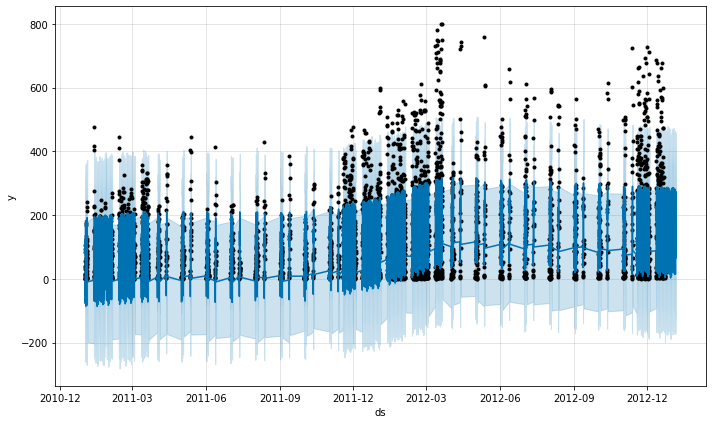

In [16]:
plot1=model.plot(forecast)

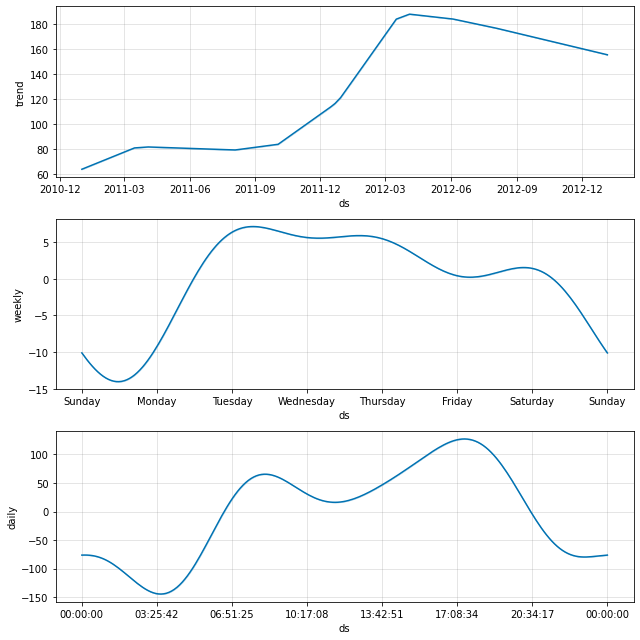

In [17]:
plot2=model.plot_components(forecast)

In [18]:
def seasons(dataset):
    dataset['datetime'] =  pd.to_datetime(dataset['datetime'])
    season = dataset[['datetime','count']]
    season.fillna(season.median(), inplace=True)
    dataset = season.rename(columns={'datetime':'ds','count':'y'})
    dataset = dataset.reset_index()
    dataset = dataset[['ds','y']]
    model = Prophet(interval_width=0.95,daily_seasonality=True)
    model = model.fit(dataset)
    future = model.make_future_dataframe(periods=144,freq='H')
    forecast = model.predict(future)
    forecast[['ds','yhat']]
    plot1 = model.plot(forecast)
    plot2 = model.plot_components(forecast)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Initial log joint probability = -100.31
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       9487.42    0.00240519       74.3822           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       9494.24     0.0018349       121.727      0.4121           1      257   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     276       9495.09   0.000106509       80.0187   9.668e-07       0.001      410  LS failed, Hessian reset 
     299       9495.66    0.00531381       131.234           1           1      433   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     361        9495.8   0.000120129       68.1554   1.774e-06       0.001      555  LS failed, Hessian reset 
     399       9495.84   1.16652e-05       65.2871           1           1      605   
    Iter      log prob

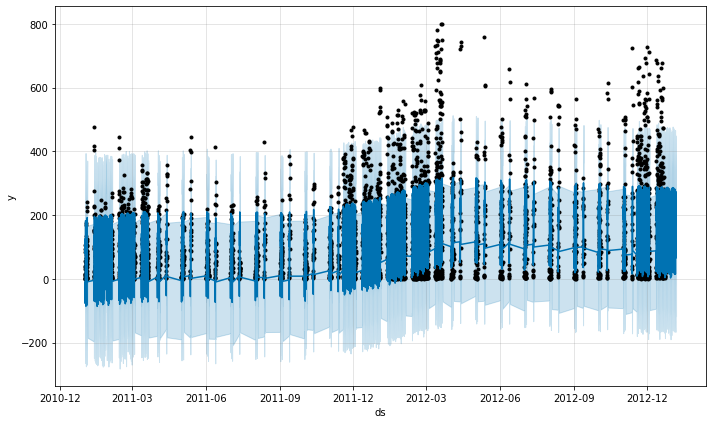

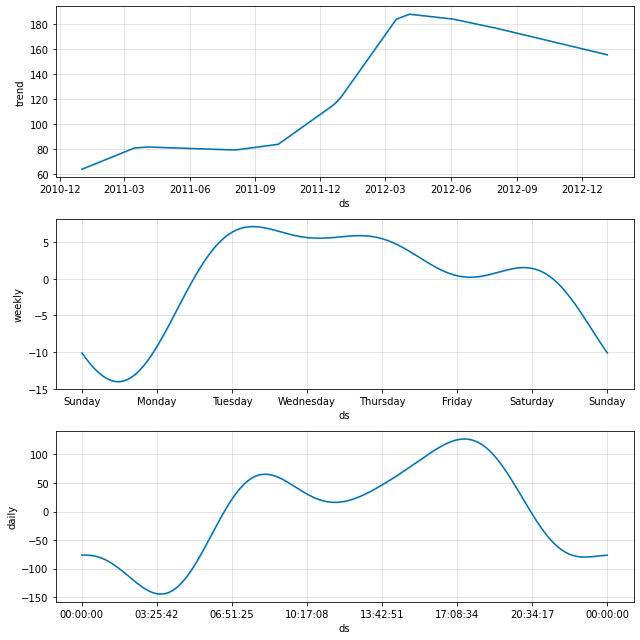

In [19]:
seasons(df_1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Initial log joint probability = -148.049
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      80       7060.97   0.000270947       77.3656   1.113e-06       0.001      157  LS failed, Hessian reset 
      99       7061.25   4.98571e-05       57.9497      0.3034      0.3034      179   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     134       7061.42    0.00063763       168.685   6.397e-06       0.001      255  LS failed, Hessian reset 
     157       7061.58   0.000124025       62.0724   2.236e-06       0.001      319  LS failed, Hessian reset 
     199       7061.63   1.15948e-06       66.6225     0.06426      0.9438      391   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     215       7061.63   5.46357e-07       50.8233      0.6614      0.6614      414   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

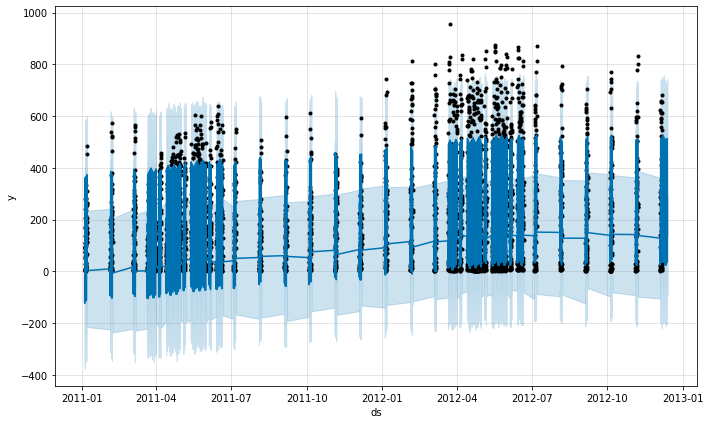

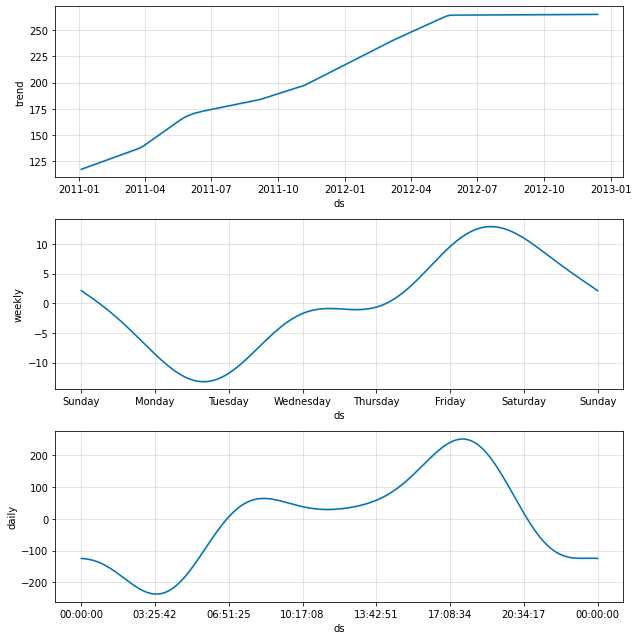

In [20]:
seasons(df_2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Initial log joint probability = -134.781
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      68       7269.72   0.000250684       129.326   1.881e-06       0.001      140  LS failed, Hessian reset 
      99       7270.35   0.000104075        66.028           1           1      178   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7270.64    0.00251409       88.4669           1           1      303   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7270.87   2.91336e-05       82.0783      0.8571      0.8571      429   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     338       7270.88   1.30987e-06       61.3641      0.6284      0.6284      482   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


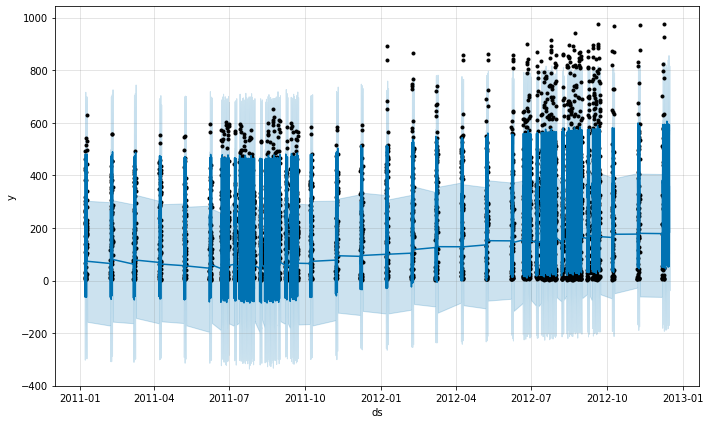

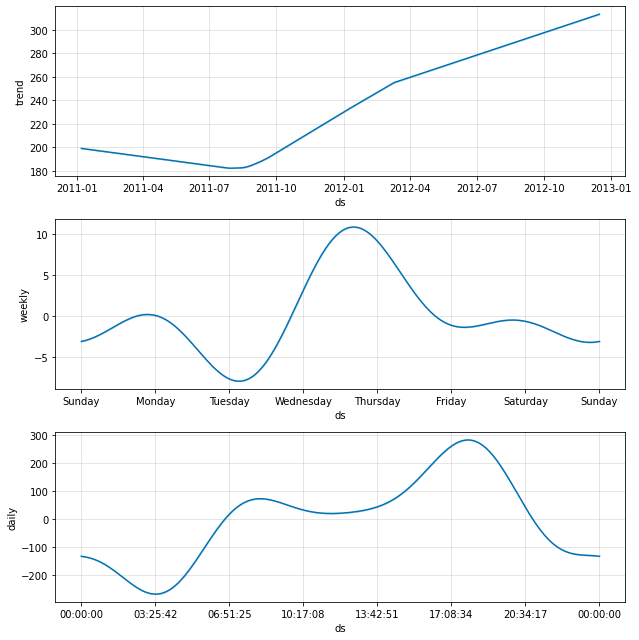

In [21]:
seasons(df_3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Initial log joint probability = -83.2005
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4095.12   0.000227921       78.2741      0.1659           1      142   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     113       4095.37   0.000183533       59.1191   2.367e-06       0.001      189  LS failed, Hessian reset 
     199       4095.57   0.000170793       61.9438      0.6565           1      300   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     234       4095.57   4.12921e-07       65.6677      0.6473      0.6473      346   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


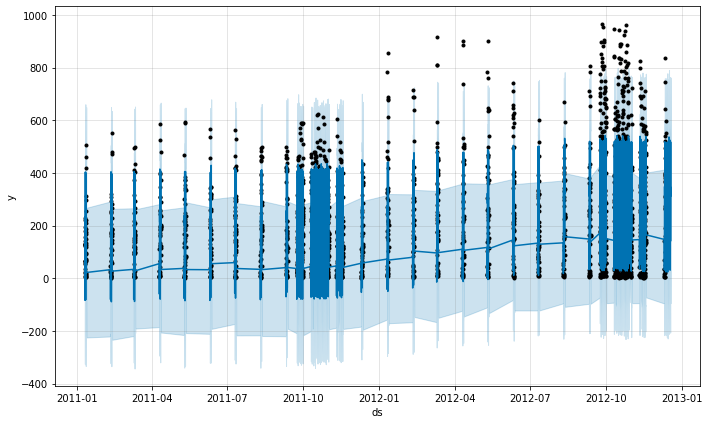

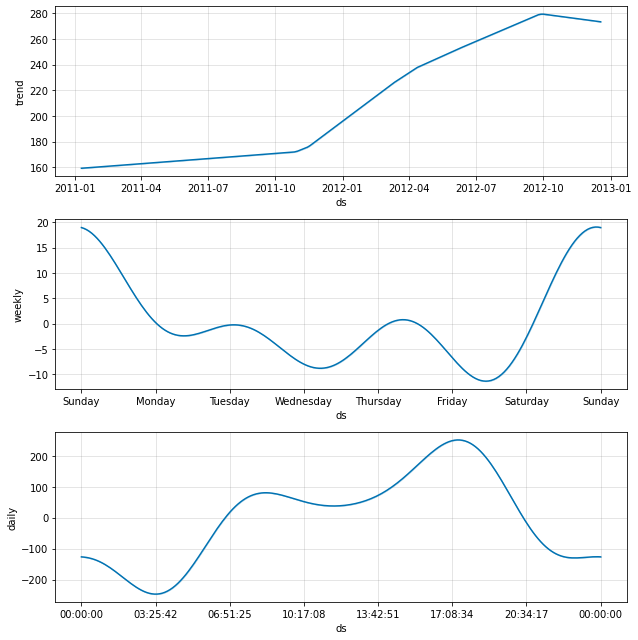

In [22]:
seasons(df_4)